In [1]:
# Load some test data
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Drop missing values from embarked
titanic = titanic.dropna().copy()
# Let's treat Pclass as categorical
titanic['Pclass_cat'] = titanic['Pclass'].astype('category')

# Encode our features and target as needed
features = ['Pclass_cat', 'Sex', 'Age', 'Embarked']
X = pd.get_dummies(titanic[features], drop_first=True)
y = titanic['Survived']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = RandomForestClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it
clf.score(X_test, y_test)

# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

0.8

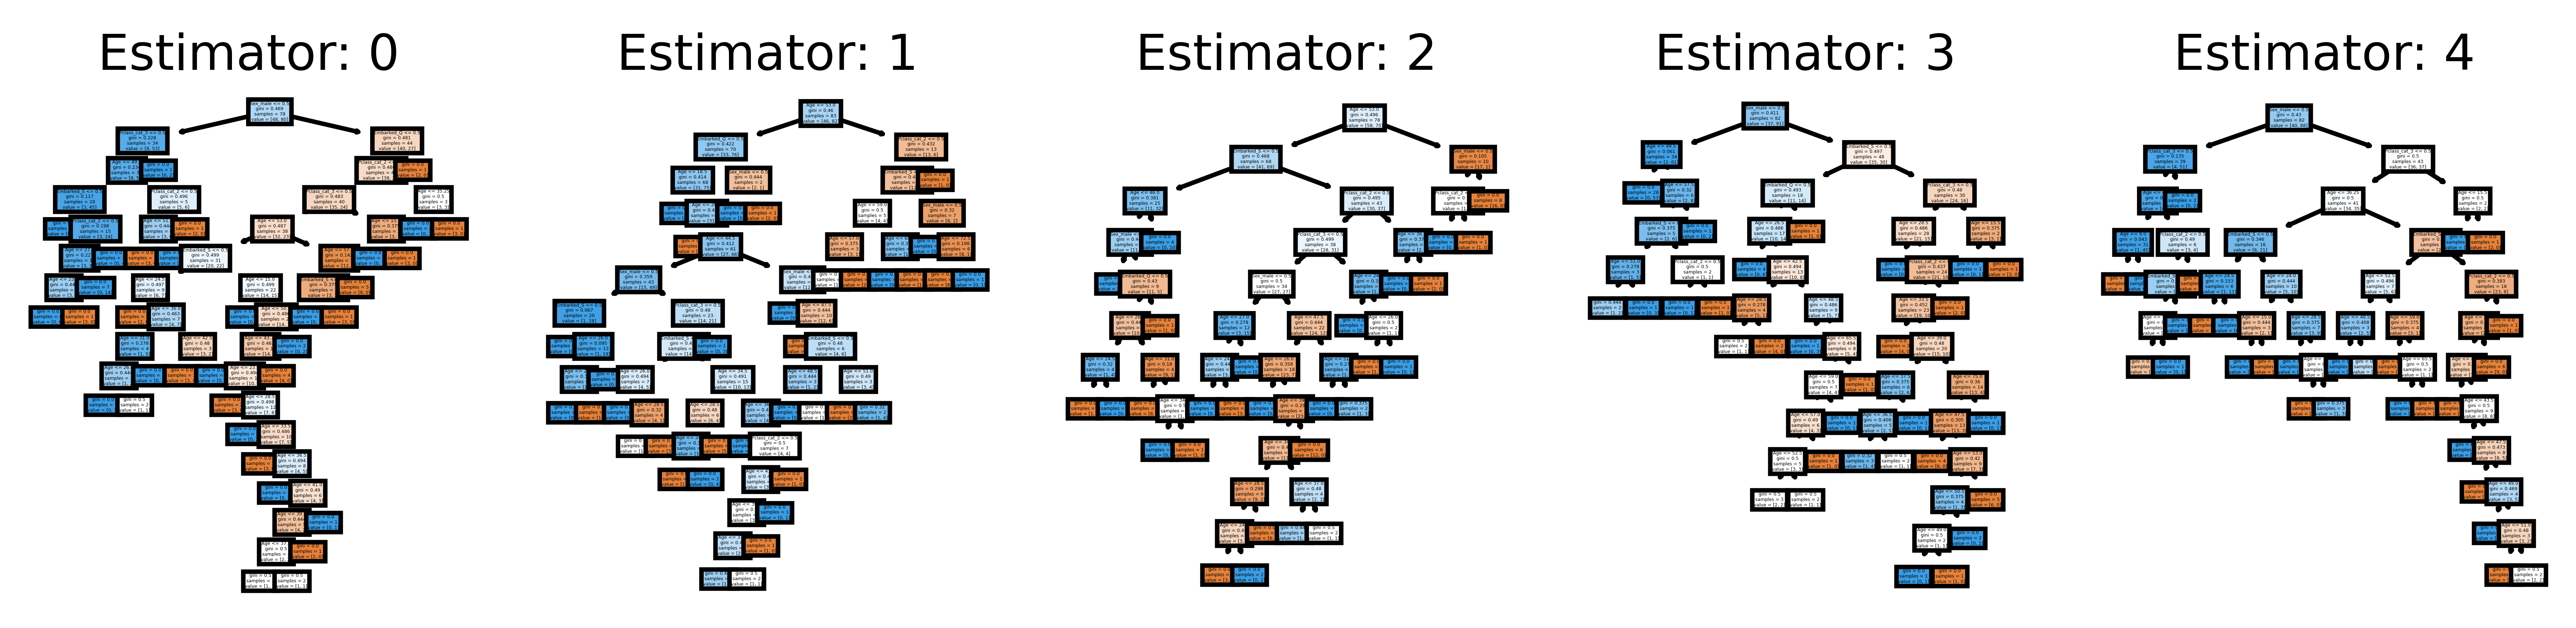

In [3]:
# Let's visualize the tree
import matplotlib.pyplot as plt
# This may not the best way to view each estimator as it is small
fn=X.columns
# cn=y.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = fn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')